## **Email Spam Detection**

**Importing the libraries**

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
import pandas as pd

# Downloading NLTK

In [ ]:
# Download NLTK stopwords and punkt data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading Dataset

In [ ]:
df = pd.read_csv('spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## PreProcessing

In [ ]:
# Text preprocessing
stop_words = set(stopwords.words('english'))
df['Message'] = df['Message'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

## Spliting Dataset into Training and Testing

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)

In [ ]:
# Convert text data to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Naive Bayes Classifier

In [ ]:
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9829596412556054
Confusion Matrix:
 [[958   8]
 [ 11 138]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.95      0.93      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



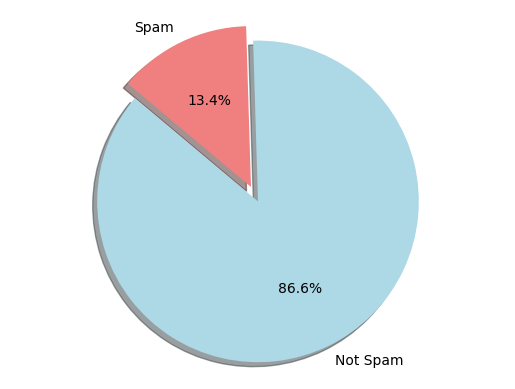

In [ ]:
import matplotlib.pyplot as plt
# Plot a pie chart to visualize the classification results
labels = ['Not Spam', 'Spam']
sizes = [sum(df['Category'] == 'ham'), sum(df['Category'] == 'spam')]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (Not Spam)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

In [ ]:
user_input = input("Enter an email: ")

# Preprocess the user input
user_input = ' '.join([word for word in word_tokenize(user_input) if word.lower() not in stop_words])

# Vectorize the user input
user_input_vectorized = vectorizer.transform([user_input])

# Make a prediction
prediction = classifier.predict(user_input_vectorized)

# Print the prediction
if prediction[0] == 'spam':
    print("Spam.")
else:
    print("Not Spam.")

Enter an email: Yeah do! Donâ€˜t stand to close tho- youâ€˜ll catch something!
Not Spam.
